# A Manual of Instructional Problems for the U.S.G.S Modflow Model

# Problem 1: The Theis Solution

## Introduction


_With the exception of_ [Darcy’s Law](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#d), _perhaps the most widely used analytical 
technique by hydrologists is the solution by Theis (1935). It is therefore 
fitting that the first problem presented in this manual is a benchmark of_ 
[MODFLOW](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#m) _with the Theis solution. Three different model configurations for 
analyzing_ [radial flow](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#r) _to a well are examined. The techniques described in 
this problem can be generally applied to well test analysis and 
representations of radial flow._


## Problem Statement and Data

[Theis’ solution](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#t) _predicts_ [drawdown](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#d) _in a_ [confined aquifer](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#c) _at any distance from a well at any time since the start of pumping given the aquifer properties,_ [transmissivity](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#t) _and_ [storage coefficient](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#s).

_**The assumptions inherent in the Theis solution include:**_

1) _The aquifer is homogeneous, isotropic, uniform thickness, and of infinite areal extent._

2) _The initial_ [potentiometric surface](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#p) _is horizontal and uniform._

3) _The well is pumped at a constant rate and it fully penetrates the_ [aquifer](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#a).

4) _Flow to the well is horizontal, the aquifer is fully confined from above and below._

5) _The well diameter is small, storage in the wellbore can be neglected._

6) _Water is removed from storage instantaneously with decline in head._

_All of these assumptions, with the exception of infinite areal extent can be
easily represented with the numerical model. Several options exist to represent the domain as effectively infinite. The most frequently applied method is to extend the model domain beyond the effects of the stress. The modeled domain is therefore usually fairly large and a limited time frame is modeled. An increasing grid spacing expansion is used to extend the model boundaries._

_The model domain is assumed to be uniform, homogeneous, and isotropic. A single layer is used to model the confined aquifer. A fully penetrating well located at the center of the model domain pumps at a constant rate. The potentiometric surface of the aquifer is monitored with time at an observation well 55 m from the_ [pumping well](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#p). _Specific details of the problem are from Freeze and Cherry (1979) pp. 345, and are given in Table 1.1._


### Table 1.2 Grid spacing used for Part a model configurations

| Row number (i) (=column number (j)) | Part a | Part b | Part c |
|-------------------------------------|--------|--------|--------|
| 1                                   | 300    | 20     | 1      |
| 2                                   | 200    | 30     | 1.413  |
| 3                                   | 150    | 30     | 2      |
| 4                                   | 100    | 40     | 2.83   |
| 5                                   | 80     | 60     | 4      |
| 6                                   | 60     | 80     | 5.65   |
| 7                                   | 40     | 100    | 8      |
| 8                                   | 30     | 150    | 11.3   |
| 9                                   | 30     | 200    | 12     |
| 10                                  | 20     | 300    | 14.62  |
| 11                                  | 30     |        | 20     |
| 12                                  | 30     |        | 28.3   |
| 13                                  | 40     |        | 40     |
| 14                                  | 60     |        | 56.5   |
| 15                                  | 80     |        | 80     |
| 16                                  | 100    |        | 110    |
| 17                                  | 150    |        | 150    |
| 18                                  | 200    |        | 200    |
| 19                                  | 300    |        | 252.89 |

## Part a

_Represent the entire aquifer domain by using the grid spacing shown in Table 1.2. Place the_ [well](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#w) _at the center of the domain, row 10, column 10. Run the model, noting drawdown at each_ [time step](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#t) _at an observation point 55 m from the pumping well. The configuration of the model for part a and future parts b, c, and d is shown in Figure 1.1._


### Table 1.2 Grid spacing used for Part a model configurations

| Row number (i) (=column number (j)) | Part a |
|-------------------------------------|--------|
| 1                                   | 300    |
| 2                                   | 200    |
| 3                                   | 150    |
| 4                                   | 100    |
| 5                                   | 80     |
| 6                                   | 60     |
| 7                                   | 40     |
| 8                                   | 30     |
| 9                                   | 30     |
| 10                                  | 20     |
| 11                                  | 30     |
| 12                                  | 30     |
| 13                                  | 40     |
| 14                                  | 60     |
| 15                                  | 80     |
| 16                                  | 100    |
| 17                                  | 150    |
| 18                                  | 200    |
| 19                                  | 300    |

Go into excel or notepad and create the table depicted above and save as a '.csv' file. csv simply stands for "comma separated values". As you can see in the code below, I named my file "table1.2a".

In [2]:
#Import any modules/packages that we need to work with
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy
import scipy.special

#You can skip this step, I just printed these out so that you can see which versions you should have for each of these
print(sys.version)
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('flopy version: {}'.format(flopy.__version__))

3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]
numpy version: 1.11.3
matplotlib version: 2.0.0
flopy version: 3.2.6


In [3]:
print(os.getcwd())
delr = [] #creates an empty list that we can later store values into
f = open('../Data/table1.2a.csv') #opens the csv file; the two periods (..) means that you are going backwards into the folders.

C:\VT\USGS Internship\modflow_epa.git\Notebooks


Going backwards into the folders is a much more efficient way of finding a file instead of typing in a long chain of 5+ folders.
* Here you'll see that I saved my table1.2a into a folder call "Data", yours can be that same name or a different one, so make sure you aren't just copying my code and that you are actually typing the proper folder name that your .csv file is located in.

The four loop below creates a statement that if i == 0 (if it's the first row in the .csv file) then it will skip it (continue) and move on to the next step in the for loop
* We skip the first row in our table1.2a.csv file because the headers would give us an error since they aren't numerical values.

In [4]:
for i,line in enumerate(f):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections off the individual values according to whatever you put in the quotes
    #we use a comma here because in the excel files our data is a .csv (*comma* separated values)
    linelist = line.strip().split(',') 
    
    value = float(linelist[1]) #changes the values in the list to floats
    print(value) #prints the values
    delr.append(value) #puts the floats into the empty list, delr 
    
print(delr) #prints the list

300.0
200.0
150.0
100.0
80.0
60.0
40.0
30.0
30.0
20.0
30.0
30.0
40.0
60.0
80.0
100.0
150.0
200.0
300.0
[300.0, 200.0, 150.0, 100.0, 80.0, 60.0, 40.0, 30.0, 30.0, 20.0, 30.0, 30.0, 40.0, 60.0, 80.0, 100.0, 150.0, 200.0, 300.0]


**Python is a 0 based code.**

This means that when we are pulling data from table1.2a and we want to get all the numerical values from row 2, we have to type (linelist[1]).

* This is because in Python: 1=0, 2=1, 3=2, ...so on and so forth

    * An easy way to think about it is that you always have to subtract 1 from the value you want to extract: 2-1=1

[ 300.  200.  150.  100.   80.   60.   40.   30.   30.   20.   30.   30.
   40.   60.   80.  100.  150.  200.  300.]
2000.0


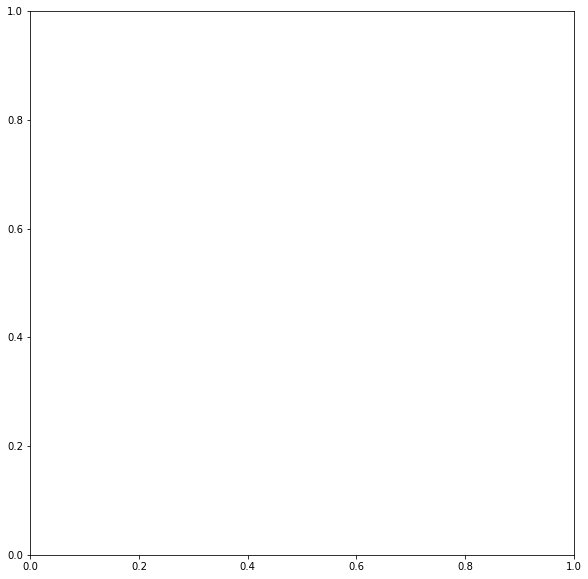

In [5]:
#code to create the grid image
fig = plt.figure(figsize=(10, 10)) #this will simply create a nice 10x10 grid for us to display when we're done
ax = fig.add_subplot(1, 1, 1, aspect='equal') #makes the length and width of the grid equal on all four sides

delr_array = np.array(delr) #changes delr values from float to array; we do this because we have to work with arrays to make the grid
print (delr_array) #print the values so you can check if they are correct
print (delr_array.sum()) #prints the sum of those values

ymax = delr_array.sum() #assigns the sum of the list to ymax
ymin = 0 #sets ymin equal to zero
xmax = ymax #makes xmax equal to ymax which is equal to the sum of the list
xmin = 0 #sets xmin equal to zero
x = 0 #sets x equal to zero
y = 0 #sets y equal to zero

Before moving on to the code below, it helps to draw out an image of a graph with each corner labled with the (x, y) coordinates of that point. That way when you are coding it you understand which values you are assigning to each corner and why it is set up that way.

* top left = (xmin, ymax)
* bottom left = (xmin, ymin)
* top right = (xmax, ymax)
* bottom right = (xmax, ymin)

As you'll see below I made all the columns blue and the rows red. This is to make it easier for you to identify which part of the code is doing what on the grid. However, eventually we will only be making the grid lines with one solid color.

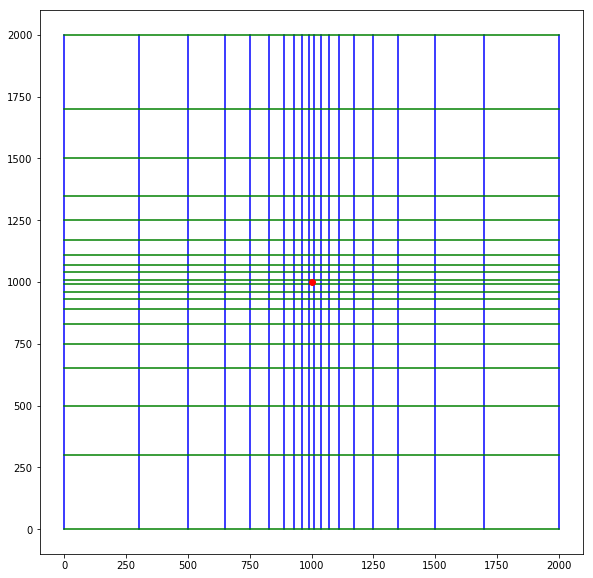

In [6]:
fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(1, 1, 1, aspect='equal') 

#Creating the columns:

plt.plot([xmin, xmin], [ymin, ymax], 'b-') #plots the first column line (on the left). Must be outside of the for loop.
#This line is outside the for loop mostly for aesthetic purposes, it is the make the grid look more complete. 
#'b-' creates a blue line out of dashes

for dx in delr: #dx will go through the values in delr one by one in the loop
    x = x + dx #add the dx value to x, and then store that new value into x
    plt.plot([x, x], [ymin, ymax], 'b-') #plots that point and then loops back to top

#Creating the rows: Repeat the process above but with the y values

plt.plot([xmin, xmax], [ymin, ymin], 'g-') #plots the first row line (on the bottom). Must be outside of the loop.
#'g-' creates a green line with dashes

for dy in delr: 
    y = y + dy
    plt.plot([xmin, xmax], [y, y], 'g-')
    
#Creating the well (red dot):  

xmean = delr_array.sum() * .5 #Assign the xmean and ymean values to the sum of the list and then divided in half
ymean = delr_array.sum() * .5 #in order the get the mean; now the well is right in the middle of the grid

def plot_well(xmean, ymean, sym):
    plt.plot(xmean, ymean, sym)
plot_well(xmean, ymean, sym='ro') #'ro' creates a red circle

### Table 1.1 Parameters used in Problem 1a

| Variable | Value  |
|----------------------------|-----------------|
| Initial head               | 0.0 m           |
| Transmissivity             | 0.0023 $\frac{m^2}{s}$   |
| Storage coefficient        | 0.00075         |
| Pumping rate               | ${4 x 10^{-3}} \frac{m^3}{s}$ |
| Final time                 | 86400 s         |
| Number of time steps       | 20              |
| Time step expansion factor | 1.3             |
| Iteration parameters       | 5               |
| Closure criterion          | 0.0001          |
| Maximum number iterations  | 50              |

In [7]:
#Store the values of each parameter into separate variables
inh = 0.0 #initial head
trans = 23.e-4 #transmissivity (is equal to hk*(top-botm))
ss = 0.00075 #storage coefficient
pr = 4.e-3 #pumping rate
perlen = 86400 #final time (period length)
nstp = 20 #number of time steps
tsmult = 1.3 #time step expansion factor (time step multiplier)
it = 5 #iteration parameters
hclose = 1.e-4 #closure criterion (the head change criterion for convergence)
mxiter = 50 #maximum number of iterations
nlay = 1 #number of layers
nrow = 19 #number of rows
ncol = 19 #number of columns

Print the values to make sure that they are all stored properly: 
* Put the words in quotes to make them a string
* The ".format" takes whatever is in the ( ) and changes it to a float, which is then stored in the { } and then printed

In [8]:
print('initial head: {}'.format(inh))
print('transmissivity: {} m^2/s'.format(trans))
print('storage coefficient: {}'.format(ss))
print('pumping rate: {} m^3/s'.format(pr))
print('final time: {} s'.format(perlen))
print('number of time steps: {}'.format(nstp))
print('time step expansion factor: {}'.format(tsmult))
print('iteration parameters: {}'.format(it))
print('closure criterion: {}'.format(hclose))
print('maximum number of iterations: {}'.format(mxiter))

initial head: 0.0
transmissivity: 0.0023 m^2/s
storage coefficient: 0.00075
pumping rate: 0.004 m^3/s
final time: 86400 s
number of time steps: 20
time step expansion factor: 1.3
iteration parameters: 5
closure criterion: 0.0001
maximum number of iterations: 50


In [9]:
#Flopy objects

modelname = 'p1_pa' #creating a name for the file: stands for problem 1 part a
exe_name = '../MF2005.1_12/bin/mf2005.exe' #telling the code where the executable is
model_ws = 'temp'
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws = model_ws)

In [10]:
#call in the discretization package (DIS)

delr = delr
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods

#If you click anywhere within the () and press [Shift] + [Tab], you will see a menu appear that displays all of the
#required and optional inputs for the package. It will also show you what all of their default values are.
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

In [11]:
#call in the basic package (BAS)

ibound = np.ones((nlay, nrow, ncol)) #np.ones(layer, row, column)
strt = np.zeros((nlay, nrow, ncol))
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

In [12]:
#call in the well package (WEL)

# In the brackets type in the cordinates of the well
# Remember to use zero-based layer, row, column indices! (Hint: subtract 1)
wel_sp1 = [[0, 9, 9, -pr]] # [[layer, row, column, pr]]
#we make the pr negative here because the well is drawing water OUT of the aquifer

stress_period_data = {0: wel_sp1}
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)

In [13]:
#call in the preconditioned conjugate-gradient package (PCG) 

pcg = flopy.modflow.ModflowPcg(mf, mxiter=mxiter, hclose=hclose)

In [14]:
#call in the layer-propery flow (LPF)

hk = trans
#recall that trans equals hk*(top-botm)
# 0 minus -1 is the same as 0+1, so 0+1 = 1 and 1 times hk is the same as hk, 
# therefore we can say that the transmissivity (trans) is equal to hk
ss = 75e-5 #storage coefficient
laytyp = np.zeros((nlay)) #sets laytyp equal to nlay (both represent the number of layers present in the simulation)
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, ss=ss, laytyp=laytyp)

In [15]:
#call in the output control package (OC)

oc = flopy.modflow.ModflowOc(mf)

In [16]:
# Write the MODFLOW model input files

mf.write_input()

In [17]:
# Run the MODFLOW model

success, buff = mf.run_model()

FloPy is using the following executable to run the model: ../MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: p1_pa.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/07/19 12:29:25

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     8    Grou

### Post processing the results

_Now that we have successfully built and run our MODFLOW model, we can look at the results. MODFLOW writes the simulated_ [heads](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#h) _to a binary data output file. We cannot look at these heads with a text editor, but flopy has a binary utility that can be used to read the heads. The following statements will read the binary head file and create a plot of simulated heads for layer 1:_

In [18]:
import flopy.utils.binaryfile as bf

# Create the headfile object
fname = os.path.join(model_ws, 'p1_pa.hds') #"os.path.join" joins together the modelname and the .hds file and stores it in fname
headobj = bf.HeadFile(fname) #create headobj and put values from fname (aka 'p1_pa.hds') inside it
times = headobj.get_times() #assign the headobj values to the variable "times"
print(times) #prints the time at each stress period

[137.10693, 315.34595, 547.05664, 848.28052, 1239.8716, 1748.9399, 2410.7288, 3271.0542, 4389.4771, 5843.4268, 7733.5615, 10190.736, 13385.063, 17537.689, 22936.102, 29954.039, 39077.355, 50937.668, 66356.07, 86400.0]


(0, 86400.0)

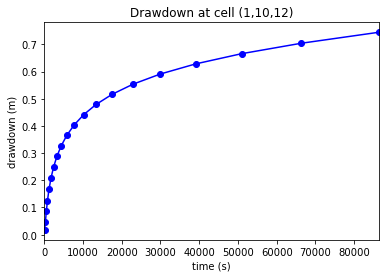

In [19]:
# Plot the drawdown versus time using model map
idx = (0, 9, 11) #(nlay, nrow, ncol) *remember you have to subtract 1 from the original numbers for python - (1, 10, 12)*
ts = headobj.get_ts(idx)
plt.subplot(1, 1, 1)
ttl = 'Drawdown at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1) #we are adding 1 to each part of idx so that 
#it prints out the real values and not the code values
plt.title(ttl) #prints/plots title
plt.xlabel('time (s)') #labels the x-axis
plt.ylabel('drawdown (m)') #labels the y-axis
plt.plot(ts[:, 0], 0-ts[:, 1], 'bo-') #(x, y, color/type of line)
#here we do "0-ts" to make the values negative because drawdown is showing the water levels DECREASE
plt.xlim(0, ts[:, 0].max())

(0, 86400.0)

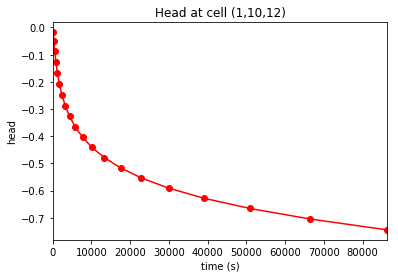

In [20]:
# Plot the head versus time using model map
idx = (0, 9, 11)
ts = headobj.get_ts(idx)
plt.subplot(1, 1, 1)
ttl = 'Head at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1)
plt.title(ttl)
plt.xlabel('time (s)')
plt.ylabel('head')
plt.plot(ts[:, 0], ts[:, 1], 'ro-')
plt.xlim(0, ts[:, 0].max())

# Theis Equation

$$s = \frac{Q}{(4{\pi}T)} \cdot W(u)$$

where:

**s** = drawdown

**Q** = pumping rate

**T** = Transmissivity

**S** = Storage

**r** = radius (the distance from the well to where you want to measure drawdown)

$$u = \frac{r^2S}{4Tt}$$

In [ ]:
def u_calc(r, S, T, t):
    u = r ** 2 * S / 4. / T / t
    return u

def well_function(u):
    return scipy.special.exp1(u)

def drawdown(Q, r, S, T, t):
    u = u_calc(r, S, T, t)
    s = Q / 4. / np.pi / T * well_function(u)
    return s

def distance(x, y, xp, yp):
    return np.sqrt((x - xp) ** 2 + (y - yp) ** 2)

(0, 86400.0)

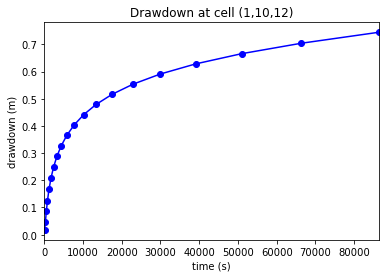

In [21]:
# Plot the drawdown versus time using the formula for drawdown
plt.subplot(1, 1, 1)
ttl = 'Drawdown at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1) #we are adding 1 to each part of idx so that 
#it prints out the real values and not the code values
plt.title(ttl) #prints/plots title
plt.xlabel('time (s)') #labels the x-axis
plt.ylabel('drawdown (m)') #labels the y-axis

d=drawdown(Q=0.004, r=55, S=0.00075, T=0.0023, t=ts[:, 0])
    
plt.plot(ts[:, 0], 0-ts[:, 1], 'bo-') #(x, y, color/type of line)
#here we do "0-ts" to make the values negative because drawdown is showing the water levels DECREASE
plt.xlim(0, ts[:, 0].max())